In [41]:
import numpy as np
import hist
import matplotlib.pyplot as plt
import mplhep as hep
from wremnants import plot_tools, theory_tools
from utilities import boostHistHelpers as hh,input_tools
import uproot
import pickle

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
genfile = "/scratch/kelong/Analysis/w_z_gen_dists.hdf5"
minnlo_wm = input_tools.read_and_scale(genfile, "WminusmunuPostVFP", "nominal_gen", calculate_lumi=False, scale=1)
minnlo_wp = input_tools.read_and_scale(genfile, "WplusmunuPostVFP", "nominal_gen", calculate_lumi=False, scale=1)
minnlo_z = input_tools.read_and_scale(genfile, "ZmumuPostVFP", "nominal_gen", calculate_lumi=False, scale=1)

In [17]:
scetlib_n3ll_wm = input_tools.read_scetlib_hist("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Wm_MSHT20_tnp_combined.pkl", nonsing="")

In [58]:
scetlib_n3ll_z = input_tools.read_scetlib_hist("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Z_MSHT20.pkl", nonsing="")
scetlib_n3ll_z_oldnp = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/matchFO/Z/inclusive_Z_MSHT20.pkl", nonsing="")
scetlib_n3ll_z_other = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Z_vars/inclusive_Z_MSHT20_N3LL_NP.pkl", nonsing="")

In [52]:
minnlo_z_pt, scetlib_n3ll_z_pt, scetlib_n3ll_z_oldnp_pt, scetlib_n3ll_z_other_pt = hh.rebinHistsToCommon([minnlo_z.project("ptVgen"), scetlib_n3ll_z.project("qT", "vars"), scetlib_n3ll_z_oldnp[{"vars" : 0}].project("qT"), scetlib_n3ll_z_other[{"vars" : 0}].project("qT")], 0)


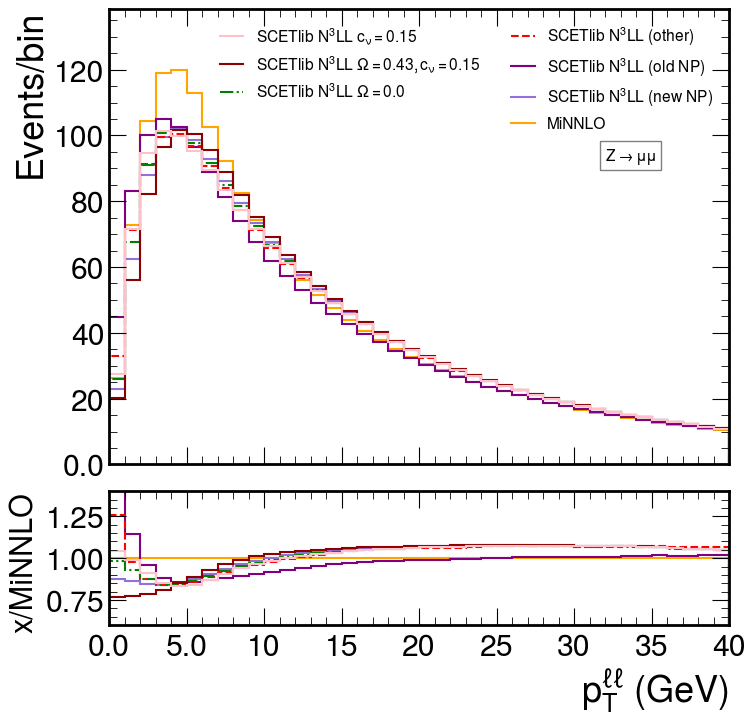

In [60]:
fig = plot_tools.makePlotWithRatioToRef(
            [minnlo_z_pt,
                 scetlib_n3ll_z_pt[{"vars" : "central"}],
                 scetlib_n3ll_z_oldnp_pt,
                 scetlib_n3ll_z_other_pt,
                 scetlib_n3ll_z_pt[{"vars" : "Omega0."}],
                 scetlib_n3ll_z_pt[{"vars" : 'c_nu-0.15-omega_nu0.43'}],
                 scetlib_n3ll_z_pt[{"vars" : 'c_nu0.05'}],
            ],
            ["MiNNLO", "SCETlib N$^{3}$LL (new NP)", "SCETlib N$^{3}$LL (old NP)", 
             "SCETlib N$^{3}$LL (other)", 
             r"SCETlib N$^{3}$LL $\Omega = 0.0$", 
             r"SCETlib N$^{3}$LL $\Omega = 0.43, c_{\nu} = 0.15$",
            r"SCETlib N$^{3}$LL $c_{\nu} = 0.15$"
            ],
            colors=["orange", "mediumpurple", "purple", "red", "green", "darkred", "pink"], 
            linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/MiNNLO",
            legtext_size=16,
            rrange=[0.6, 1.4],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True, extra_text=r"$Z\rightarrow\mu\mu$")

In [42]:
scetlib_new = pickle.load(open("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Wm_MSHT20_tnp_combined.pkl", "rb"))